## Predicting EBITDA of top 500 Brazilian companies

This project explores data from Exame's list of 500 top Brazilian companies ranked by their net sales and deploys a machine learning model to predict their EBITDA. The goal is to answer four questions:

**- Is it possible to predict the EBITDA in US million (Earnings Before Interest, Taxes, Depreciation, and Amortization), which is a measure of profitability, of Brazilian's largest companies? Can the prediction be used as an indicator of economic crisis?** [Question 1 Answer](#Question-1-Answer)<br>

**- What are the drivers of EBITDA?** [Question 2 Answer](#Question-2-Answer)<br>

**- In a high indebtedness scenario, are companies that have a larger degree of maneuvre for investments, as measured by the Net working capital in US million, more profitable?** [Question 3 Answer](#Question-3-Answer)<br>

**- Are there differences in profitability between private Brazilian companies, foreign controlled ones, and State-Owned Enterprises?** [Question 4 Answer](#Question-4-Answer)<br>


## Table of Contents

I. [Preliminary Data Cleaning](#Preliminary-Data-Cleaning)<br>
II. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
III. [Model Preparation](#Model-Preparation)<br>
IV. [Machine Learning Modelling](#Machine-Learning-Modelling)<br>
V. [Conclusion](#Conclusion)<br>

In [270]:
#import libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from time import time
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
import statsmodels.formula.api as sm
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [271]:
# Read in the data
df = pd.read_csv('exame500.csv')
# Show df for a preliminary glimpse of the data
df.head()

,Posicao,EMPRESA,SETOR,VENDAS LÍQUIDAS VALOR(EM R$ MILHÕES),VENDAS LÍQUIDAS VALOR(EM US$ MILHÕES),VENDAS LÍQUIDAS CRESCIMENTO(EM %),LUCRO LÍQUIDO AJUSTADO(EM US$ MILHÕES),LUCRO LÍQUIDO LEGAL(EM US$ MILHÕES),PATRIMÔNIO LÍQUIDO AJUSTADO(EM US$ MILHÕES),PATRIMÔNIO LÍQUIDO LEGAL(EM US$ MILHÕES),...,RIQUEZA CRIADA(EM US$ MILHÕES),NO. DE EMPREG.,RIQUEZA CRIADA POR EMPREG.(EM US$ MIL),SALÁRIOS E ENCARGOS(EM US$ MILHÕES),TRIBUTOS(EM US$ MILHÕES),EBITDA(EM US$ MILHÕES),EXPORTAÇÃO VALOR(EM US$ MILHÕES),EXPORTAÇÃO % DAS VENDAS,CONTROLE ACIONÁRIO,Ano
0,479,Crown,Siderurgia e Metalurgia,1422.6,352.9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amer./Brasileiro,2016
1,470,Digibras,Indústria Digital,1468.1,364.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chinês,2016
2,481,Paquetá Calçados,Têxteis,1505.2,373.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brasileiro,2017
3,478,Amanco,Indústria da Construção,1525.2,378.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,50.6,NaN,NaN,5.7,1.5,Mexicano,2015
4,474,Huawei,Eletroeletrônico,1532.7,380.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chinês,2017


In [272]:
#Cheching the df's shape
df.shape

(2500, 27)

The dataframe has 2500 lines (datapoints) and 27 features. 

# Dear reviewer, the information you asked for had already been included here

"Note the size and shape of the dataset. How many dimensions/features are there? How many data points?"


In [273]:
# With this code some descriptive statistics are shown
df.describe()

,Posicao,VENDAS LÍQUIDAS VALOR(EM R$ MILHÕES),VENDAS LÍQUIDAS VALOR(EM US$ MILHÕES),VENDAS LÍQUIDAS CRESCIMENTO(EM %),LUCRO LÍQUIDO AJUSTADO(EM US$ MILHÕES),LUCRO LÍQUIDO LEGAL(EM US$ MILHÕES),PATRIMÔNIO LÍQUIDO AJUSTADO(EM US$ MILHÕES),PATRIMÔNIO LÍQUIDO LEGAL(EM US$ MILHÕES),RENTABILIDADE AJUSTADA(EM %),RENTABILIDADE LEGAL(EM %),...,ENDIVIDAMENTO LONGO PRAZO(EM %),RIQUEZA CRIADA(EM US$ MILHÕES),NO. DE EMPREG.,RIQUEZA CRIADA POR EMPREG.(EM US$ MIL),SALÁRIOS E ENCARGOS(EM US$ MILHÕES),TRIBUTOS(EM US$ MILHÕES),EBITDA(EM US$ MILHÕES),EXPORTAÇÃO VALOR(EM US$ MILHÕES),EXPORTAÇÃO % DAS VENDAS,Ano
count,2500.000000,2500.000000,2500.000000,1951.000000,2022.000000,2023.000000,2022.000000,2031.000000,1832.000000,1860.000000,...,2030.000000,1414.000000,1803.000000,1335.000000,1600.000000,1414.000000,1994.000000,802.000000,802.000000,2500.000000
mean,250.500000,6308.294400,1565.062600,6.094567,70.992038,67.999061,1151.379377,1104.704973,8.916212,8.446022,...,28.946995,719.832107,6382.962285,295.427940,139.029937,342.894979,238.612337,680.880923,28.656608,2017.000000
std,144.366155,15348.150893,3807.814092,28.446529,620.361342,613.126918,4610.029476,4358.491698,31.145936,37.453242,...,23.091863,3344.234290,11187.597144,980.108432,351.942600,1726.250635,1137.094096,1845.777903,30.402242,1.414496
min,1.000000,1364.900000,338.600000,-58.700000,-13978.700000,-12988.600000,-3666.400000,-3706.700000,-611.100000,-662.000000,...,0.000000,-4278.200000,0.000000,-4282.500000,0.000000,-1368.900000,-4464.300000,0.000000,0.000000,2015.000000
25%,125.750000,2045.050000,507.375000,-5.100000,3.600000,3.400000,107.525000,101.600000,3.075000,3.200000,...,12.025000,117.175000,1163.000000,32.250000,28.200000,22.675000,24.950000,30.750000,3.125000,2016.000000
50%,250.500000,3100.050000,769.100000,3.000000,27.850000,28.400000,321.950000,309.500000,11.300000,11.800000,...,24.350000,249.500000,2833.000000,77.300000,64.600000,78.700000,77.750000,141.650000,17.550000,2017.000000
75%,375.250000,5515.125000,1368.250000,11.600000,90.800000,91.300000,898.400000,865.300000,18.800000,19.900000,...,41.575000,590.725000,6973.000000,277.800000,146.350000,224.625000,204.300000,502.625000,43.500000,2018.000000
max,500.000000,311173.100000,77200.800000,454.500000,11803.100000,9957.800000,84656.400000,74832.900000,120.700000,136.600000,...,219.000000,64267.900000,118220.000000,19895.000000,6481.200000,32682.200000,33622.700000,19206.200000,100.000000,2019.000000


# Dear reviewer, the information you asked for had already been included here

"You should also include some (brief) statistical analysis in your data exploration. As noted, you could choose to provide some descriptive statistical analysis for a few of the features (noting the mean/median/std. deviation etc.)."

### <a class="anchor" id="Preliminary-Data-Cleaning">Part I : Preliminary Data Cleaning</a>

In [274]:
# retrieving column names for translation
list(df.columns)

['Posicao',
 'EMPRESA',
 'SETOR',
 'VENDAS LÍQUIDAS VALOR(EM R$ MILHÕES)',
 'VENDAS LÍQUIDAS VALOR(EM US$ MILHÕES)',
 'VENDAS LÍQUIDAS CRESCIMENTO(EM %)',
 'LUCRO LÍQUIDO AJUSTADO(EM US$ MILHÕES)',
 'LUCRO LÍQUIDO LEGAL(EM US$ MILHÕES)',
 'PATRIMÔNIO LÍQUIDO AJUSTADO(EM US$ MILHÕES)',
 'PATRIMÔNIO LÍQUIDO LEGAL(EM US$ MILHÕES)',
 'RENTABILIDADE AJUSTADA(EM %)',
 'RENTABILIDADE LEGAL(EM %)',
 'RENTABILIDADE SOBRE VENDAS(EM %)',
 'CAPITAL CIRCUL. LÍQUIDO(EM US$ MILHÕES)',
 'LIQUIDEZ GERAL(EM NO. ÍNDICE)',
 'ENDIVIDAMENTO GERAL(EM %)',
 'ENDIVIDAMENTO LONGO PRAZO(EM %)',
 'RIQUEZA CRIADA(EM US$ MILHÕES)',
 'NO. DE EMPREG.',
 'RIQUEZA CRIADA POR EMPREG.(EM US$ MIL)',
 'SALÁRIOS E ENCARGOS(EM US$ MILHÕES)',
 'TRIBUTOS(EM US$ MILHÕES)',
 'EBITDA(EM US$ MILHÕES)',
 'EXPORTAÇÃO VALOR(EM US$ MILHÕES)',
 'EXPORTAÇÃO % DAS VENDAS',
 'CONTROLE ACIONÁRIO',
 'Ano']

In [275]:
# Translating column names into english and making their names sensible
df = df.rename(columns={'Posicao':'rank',                                          
'EMPRESA':'company',                                          
'SETOR':'sector',                                            
'VENDAS LÍQUIDAS VALOR(EM R$ MILHÕES)':'net_sales_R$million',             
'VENDAS LÍQUIDAS VALOR(EM US$ MILHÕES)':'net_sales_US$million',           
'VENDAS LÍQUIDAS CRESCIMENTO(EM %)':'net_sales_perc_growth',              
'LUCRO LÍQUIDO AJUSTADO(EM US$ MILHÕES)':'adjusted_net_income_US$million',           
'LUCRO LÍQUIDO LEGAL(EM US$ MILHÕES)':'legal_net_income_US$million',              
'PATRIMÔNIO LÍQUIDO AJUSTADO(EM US$ MILHÕES)':'adjusted_shareholder_equity_US$million',      
'PATRIMÔNIO LÍQUIDO LEGAL(EM US$ MILHÕES)':'legal_net_equity_US$million',         
'RENTABILIDADE AJUSTADA(EM %)':'adjusted_profit_US$million',                   
'RENTABILIDADE LEGAL(EM %)':'legal_profitability_perc',                      
'RENTABILIDADE SOBRE VENDAS(EM %)':'sales_profitability_perc',                 
'CAPITAL CIRCUL. LÍQUIDO(EM US$ MILHÕES)':'net_working_capital_US$million',         
'LIQUIDEZ GERAL(EM NO. ÍNDICE)':'general_liquidity',                  
'ENDIVIDAMENTO GERAL(EM %)':'general_indebtedness_perc',                        
'ENDIVIDAMENTO LONGO PRAZO(EM %)':'long_term_indebtedness_perc',                  
'RIQUEZA CRIADA(EM US$ MILHÕES)':'wealth_created_US$million',                   
'NO. DE EMPREG.':'employees',                                   
'RIQUEZA CRIADA POR EMPREG.(EM US$ MIL)':'wealth_created_employee_US$million',          
'SALÁRIOS E ENCARGOS(EM US$ MILHÕES)':'wages_and_charges_US$million',              
'TRIBUTOS(EM US$ MILHÕES)':'taxes_US$million',                         
'EBITDA(EM US$ MILHÕES)':'ebitda_US$million',                           
'EXPORTAÇÃO VALOR(EM US$ MILHÕES)':'exports_US$million',                 
'EXPORTAÇÃO % DAS VENDAS':'exports_perc_sales',                          
'CONTROLE ACIONÁRIO':'equity_control',                               
'Ano':'year'   
                        })
# check if that worked
df.head(1)

,rank,company,sector,net_sales_R$million,net_sales_US$million,net_sales_perc_growth,adjusted_net_income_US$million,legal_net_income_US$million,adjusted_shareholder_equity_US$million,legal_net_equity_US$million,...,wealth_created_US$million,employees,wealth_created_employee_US$million,wages_and_charges_US$million,taxes_US$million,ebitda_US$million,exports_US$million,exports_perc_sales,equity_control,year
0,479,Crown,Siderurgia e Metalurgia,1422.6,352.9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amer./Brasileiro,2016


In [276]:
# Retrieving different values from "sector" column
df['sector'].value_counts()

Energia                    421
Atacado                    271
Varejo                     230
Bens de Consumo            195
Produção Agropecuária      165
Química e Petroquímica     155
Serviços de Saúde          147
Autoindústria              116
Siderurgia e Metalurgia    108
Transporte                 107
Serviços                    87
Infraestrutura              73
Indústria Digital           60
Indústria da Construção     55
Eletroeletrônico            55
Mineração                   55
Farmacêutico                51
Telecomunicações            42
Papel e Celulose            32
Têxteis                     24
Diversos                    21
Bens de Capital             19
Comunicações                11
Name: sector, dtype: int64

In [277]:
# Translating these values into English
df = df.replace(to_replace={'Energia':'Energy',                    
'Atacado':'Wholesale',                    
'Varejo':'Retail',                     
'Bens de Consumo':'Consumer goods',            
'Produção Agropecuária':'Agriculture',      
'Química e Petroquímica':'Chemicals and Petrochemicals',      
'Serviços de Saúde':'Health services',          
'Autoindústria':'Auto industry',              
'Siderurgia e Metalurgia':'Steel and Metallurgy',     
'Transporte':'Transport',                 
'Serviços':'Services',                    
'Infraestrutura':'Infrastructure',             
'Indústria Digital':'IT',           
'Eletroeletrônico':'Electronics',            
'Indústria da Construção':'Construction industry',      
'Mineração':'Mining',                   
'Farmacêutico':'Pharmaceutical',              
'Telecomunicações':'Telecommunications',             
'Papel e Celulose':'Paper and Cellulose',             
'Têxteis':'Textiles',                      
'Diversos':'Divers',                    
'Bens de Capital':'Capital goods',             
'Comunicações':'Communications'          }, value=None)

In [278]:
# Chech if that worked
df['sector'].value_counts()

Energy                          421
Wholesale                       271
Retail                          230
Consumer goods                  195
Agriculture                     165
Chemicals and Petrochemicals    155
Health services                 147
Auto industry                   116
Steel and Metallurgy            108
Transport                       107
Services                         87
Infrastructure                   73
IT                               60
Construction industry            55
Mining                           55
Electronics                      55
Pharmaceutical                   51
Telecommunications               42
Paper and Cellulose              32
Textiles                         24
Divers                           21
Capital goods                    19
Communications                   11
Name: sector, dtype: int64

In [279]:
# Retrieving different values from "equity control" column
df['equity_control'].value_counts()

Brasileiro            1272
Estatal                224
Americano              222
Francês                 94
Alemão                  67
Japonês                 57
Espanhol                53
Chinês                  50
Suíço                   44
Pulverizado             41
Italiano                35
Português               27
Holandês                24
Bras-Anglo-Holand       24
Norueguês               22
Belga                   21
Mexicano                21
Inglês                  16
Anglo-Indiano           15
Sueco                   13
Anglo-holandês          12
Coreano                 12
Indiano                 11
Canadense               10
Argentino                9
Chileno                  9
Australiano              8
Amer./Brasileiro         7
Nipo-ítalo-Brasil.       7
Franco-Belga             5
Sul-africano             5
Irlandês                 5
Brasilo-holandês         5
Franco-brasileiro        5
Colombiano               5
Ítalo-Argentino          4
Germano-Saudita          3
A

In [280]:
# Translating these values into English and condensing to only four categories
df = df.replace(to_replace={'Brasileiro':'Private Brazilian',            
'Estatal':'State-owned-enterprise',                
'Americano':'Foreign',              
'Francês':'Foreign',                 
'Alemão':'Foreign',                 
'Japonês':'Foreign',                 
'Espanhol':'Foreign',                
'Chinês':'Foreign',                  
'Suíço':'Foreign',                   
'Pulverizado':'Foreign',             
'Italiano':'Foreign',                
'Português':'Foreign',               
'Bras-Anglo-Holand':'Brazilian - Foreign',       
'Holandês':'Foreign',                
'Norueguês':'Foreign',               
'Belga':'Foreign',                   
'Mexicano':'Foreign',                
'Inglês':'Foreign',                  
'Anglo-Indiano':'Foreign',           
'Sueco':'Foreign',                  
'Anglo-holandês':'Foreign',          
'Coreano':'Foreign',                 
'Indiano':'Foreign',                 
'Canadense':'Foreign',               
'Chileno':'Foreign',                  
'Argentino':'Foreign',                
'Australiano':'Foreign',              
'Amer./Brasileiro':'Brazilian - Foreign',         
'Nipo-ítalo-Brasil.':'Brazilian - Foreign',       
'Franco-Belga':'Foreign',             
'Brasilo-holandês':'Brazilian - Foreign',         
'Colombiano':'Foreign',               
'Sul-africano':'Foreign',             
'Irlandês':'Foreign',                 
'Franco-brasileiro':'Brazilian - Foreign',        
'Ítalo-Argentino':'Foreign',          
'Anglo-Suíço':'Foreign',              
'Israelense':'Foreign',              
'Tailandês':'Foreign',                
'Germano-Saudita':'Foreign',          
'Dinamarquês':'Foreign',              
'Anglo-India/Belga':'Foreign',        
'Brasilo-coreano':'Brazilian - Foreign',          
'Nipo-Arg-Bra':'Brazilian - Foreign',             
'Russo':'Foreign',                    
'Luxemburguês':'Foreign',             
'fra-bra-jap':'Brazilian - Foreign',              
'Nipo-Americano':'Foreign',           
'Panamenho':'Foreign',                
'Brasilo-austral.':'Brazilian - Foreign',         
'Saudita':'Foreign',                  
'Britânico':'Foreign',                
'N':'NA',                        
'Estatal/Brasileiro':'State - privately owned Brazilian',       
'Austríaco':'Foreign',                
'Brasilo-suíço':'Brazilian - Foreign',            
'Anglo-Sueco':'Foreign',              
'Finlandês':'Foreign' }, value=None)

In [281]:
# Chech if that worked
df['equity_control'].value_counts()

Private Brazilian                    1272
Foreign                               946
State-owned-enterprise                224
Brazilian - Foreign                    56
NA                                      1
State - privately owned Brazilian       1
Name: equity_control, dtype: int64

In [282]:
# Now checking the incidence of nan values
df.isna().sum()

rank                                         0
company                                      0
sector                                       0
net_sales_R$million                          0
net_sales_US$million                         0
net_sales_perc_growth                      549
adjusted_net_income_US$million             478
legal_net_income_US$million                477
adjusted_shareholder_equity_US$million     478
legal_net_equity_US$million                469
adjusted_profit_US$million                 668
legal_profitability_perc                   640
sales_profitability_perc                   478
net_working_capital_US$million             487
general_liquidity                          487
general_indebtedness_perc                  469
long_term_indebtedness_perc                470
wealth_created_US$million                 1086
employees                                  697
wealth_created_employee_US$million        1165
wages_and_charges_US$million               900
taxes_US$mill

In [283]:
# Dropping columns where NA > 1000
df.drop(['wealth_created_US$million', 'wealth_created_employee_US$million', 'taxes_US$million', 'exports_US$million', 'exports_perc_sales'], axis=1, inplace=True)
df

,rank,company,sector,net_sales_R$million,net_sales_US$million,net_sales_perc_growth,adjusted_net_income_US$million,legal_net_income_US$million,adjusted_shareholder_equity_US$million,legal_net_equity_US$million,...,sales_profitability_perc,net_working_capital_US$million,general_liquidity,general_indebtedness_perc,long_term_indebtedness_perc,employees,wages_and_charges_US$million,ebitda_US$million,equity_control,year
0,479,Crown,Steel and Metallurgy,1422.6,352.9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brazilian - Foreign,2016
1,470,Digibras,IT,1468.1,364.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foreign,2016
2,481,Paquetá Calçados,Textiles,1505.2,373.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private Brazilian,2017
3,478,Amanco,Construction industry,1525.2,378.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,50.6,NaN,Foreign,2015
4,474,Huawei,Electronics,1532.7,380.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foreign,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,440,Santher,Paper and Cellulose,1682.6,417.4,-1.3,-5.8,-14.0,14.8,4.8,...,-1.4,-35.5,0.6,95.4,46.2,NaN,NaN,39.0,Private Brazilian,2015
2496,87,Minerva Foods,Agriculture,7204.0,1787.3,1.4,-70.1,-75.5,27.5,19.1,...,-3.9,414.5,0.5,99.0,70.7,NaN,NaN,223.1,Private Brazilian,2017
2497,436,Algar Agro,Agriculture,1711.4,424.6,-32.5,-49.6,-51.7,13.9,10.5,...,-11.7,-99.8,0.6,96.8,19.9,NaN,NaN,9.6,Private Brazilian,2017
2498,402,ALL Malha Paulista,Transport,1833.0,454.8,7.0,-5.7,-60.5,73.9,11.8,...,-1.2,-521.9,0.4,95.3,56.1,1174.0,NaN,76.2,Private Brazilian,2015


In [284]:
# Dropping nan values
df = df.dropna()

In [285]:
# check the incidence of nan values
df.isna().sum()

rank                                      0
company                                   0
sector                                    0
net_sales_R$million                       0
net_sales_US$million                      0
net_sales_perc_growth                     0
adjusted_net_income_US$million            0
legal_net_income_US$million               0
adjusted_shareholder_equity_US$million    0
legal_net_equity_US$million               0
adjusted_profit_US$million                0
legal_profitability_perc                  0
sales_profitability_perc                  0
net_working_capital_US$million            0
general_liquidity                         0
general_indebtedness_perc                 0
long_term_indebtedness_perc               0
employees                                 0
wages_and_charges_US$million              0
ebitda_US$million                         0
equity_control                            0
year                                      0
dtype: int64

In [286]:
#Cheching the df's shape after NAN's removal
df.shape

(1325, 22)

### <a class="anchor" id="Exploratory-Data-Analysis">Part II : Exploratory Data Analysis</a>

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



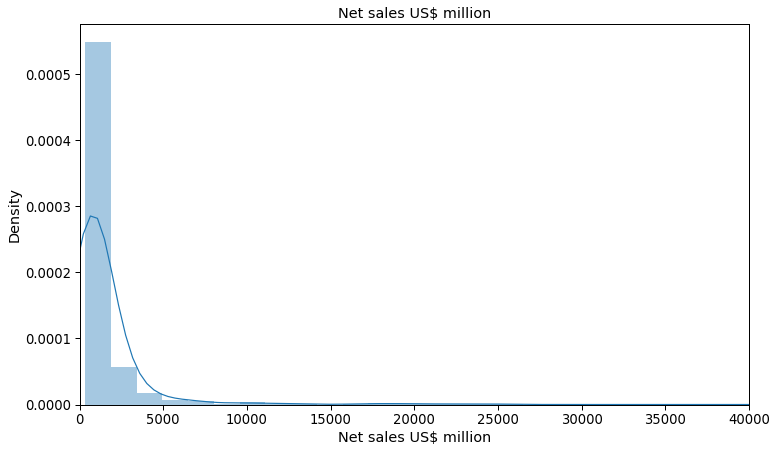

In [287]:
# Creating "Net sales US$ million" distribution plot
plt.figure(figsize=(12, 7))
sns.set_context("paper", font_scale=1.5)  
plt.xlim(0, 40000)
ax = sns.distplot(df['net_sales_US$million'])
ax.set(xlabel='Net sales US$ million')
ax.set_title('Net sales US$ million')
plt.show()

For the vast majority of data points the Net Sales in US$ million have been quite small in the 5 years of the analysis (2015-2019). This suggests that, with few exceptions, Brazil does not have very large companies, or that indeed this is a crisis scenario.

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



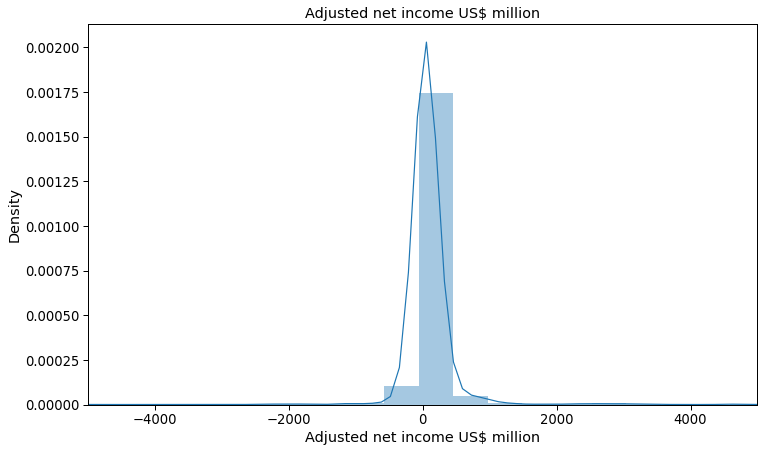

In [288]:
# Creating "Adjusted net income US$ million" distribution plot
plt.figure(figsize=(12, 7))
sns.set_context("paper", font_scale=1.5)  
plt.xlim(-5000, 5000)
ax = sns.distplot(df['adjusted_net_income_US$million'])
ax.set(xlabel='Adjusted net income US$ million')
ax.set_title('Adjusted net income US$ million')
plt.show()

For the vast majority of data points the Adjusted net income in US$ million has been small. It is also noteworthy that there are more companies with a negative one than a slightly smaller than average one, which reflects the fact that the period in consideration has been of economic crisis. Again, it may also reflect the fact that companies are small.

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



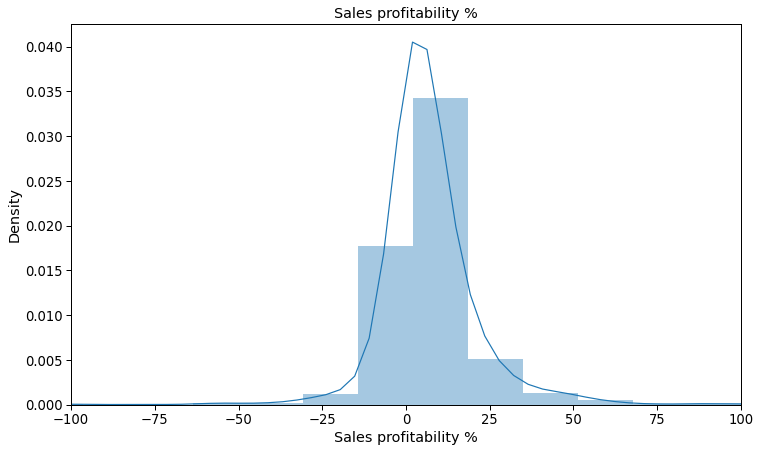

In [289]:
# Creating "Sales profitability %" distribution plot
plt.figure(figsize=(12, 7))
sns.set_context("paper", font_scale=1.5)  
plt.xlim(-100, 100)
ax = sns.distplot(df['sales_profitability_perc'])
ax.set(xlabel='Sales profitability %')
ax.set_title('Sales profitability %')
plt.show()

Possibily reflecting the economic crisis that struck Brazil in the 2015-2019 period, the majority of data points are concentrated in lower tiers of sales profitability in %. 

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



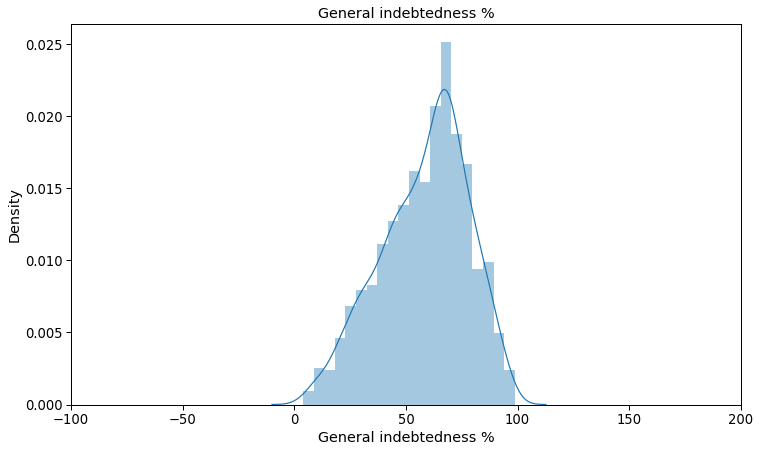

In [290]:
# Creating "General indebtedness %" distribution plot
plt.figure(figsize=(12, 7))
sns.set_context("paper", font_scale=1.5)  
plt.xlim(-100, 200)
ax = sns.distplot(df['general_indebtedness_perc'])
ax.set(xlabel='General indebtedness %')
ax.set_title('General indebtedness %')
plt.show()

The majority of data points in the indicator "General Indebteness %" are concentrated in the 50-100% range, which is also a reflection of the crisis-struck period of Brazil's economic history under analysis. 

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



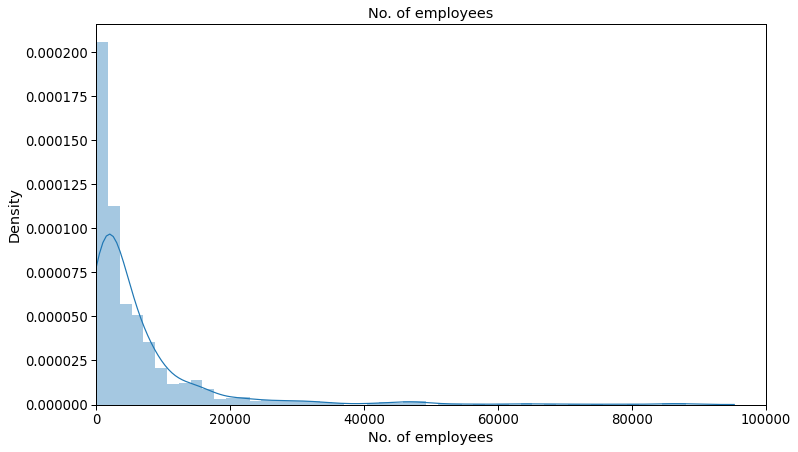

In [291]:
# Creating "No. of employees" distribution plot
plt.figure(figsize=(12, 7))
sns.set_context("paper", font_scale=1.5)  
plt.xlim(0, 100000)
ax = sns.distplot(df['employees'])
ax.set(xlabel='No. of employees')
ax.set_title('No. of employees')
plt.show()

The vast majority of data points in the "No. of employees" category is concentrated in the lowest tier. This reflects the tendentially lower size of the companies in the 500 largest companies ranking.

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



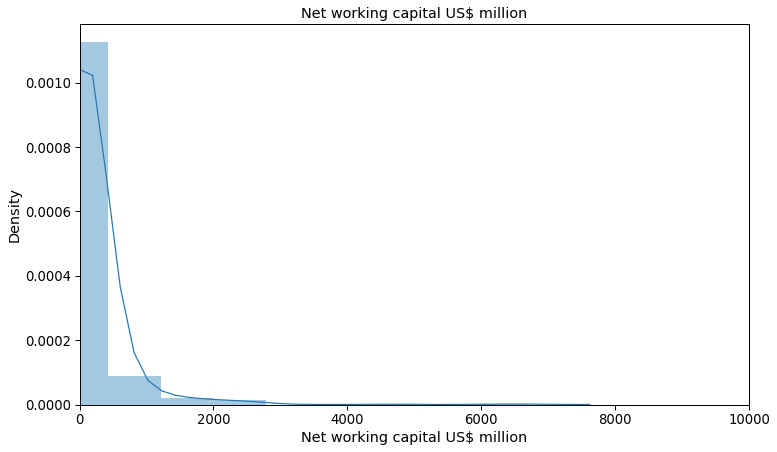

In [292]:
# Creating "Net working capital US$ million" distribution plot
plt.figure(figsize=(12, 7))
sns.set_context("paper", font_scale=1.5)  
plt.xlim(0, 10000)
ax = sns.distplot(df['net_working_capital_US$million'])
ax.set(xlabel='Net working capital US$ million')
ax.set_title('Net working capital US$ million')
plt.show()

The indicator "Net working capital" gives the difference between a company's total current assets and current liabilities, and thus reflects its financial health and ability to invest. The poor performance of this indicator also reflects a period of economic crisis. One hypothesis is that the smaller the companies' degree of maneuvre to invest, the higher the probability that in the future its net revenues will not increase.

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



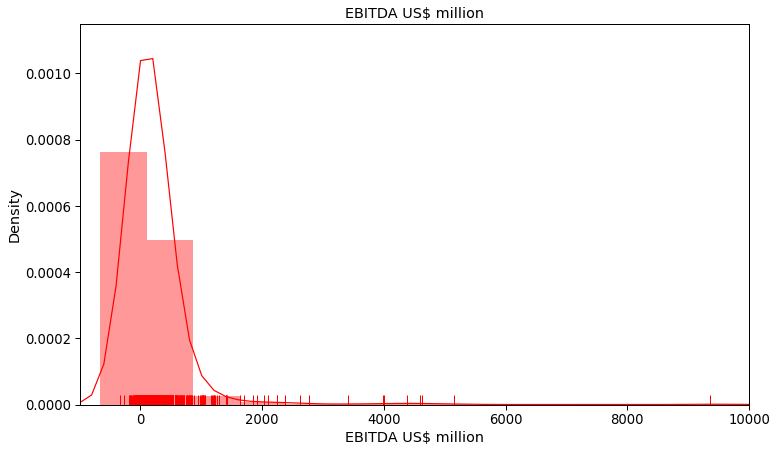

In [293]:
# Creating "EBITDA US$ million" distribution plot
plt.figure(figsize=(12, 7))
sns.set_context("paper", font_scale=1.5)  
plt.xlim(-1000, 10000)
ax = sns.distplot(df['ebitda_US$million'], color="r", rug=True)
ax.set(xlabel='EBITDA US$ million')
ax.set_title('EBITDA US$ million')
plt.show()

The indicator EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization) is a measure of a company's profitability. The fact that it has been low or negative for most companies reflects that this is a period of crisis and the fact that Brazil's top 500 companies are tendentially small in size.

In [294]:
# Create dataframe in which variables are grouped by year and added
df_by_year = df.groupby(['year']).sum()
df_by_year.set_index('rank', inplace=True)
year = ['2015', '2016', '2017', '2018', '2019']
df_by_year['year'] = year
df_by_year


,net_sales_R$million,net_sales_US$million,net_sales_perc_growth,adjusted_net_income_US$million,legal_net_income_US$million,adjusted_shareholder_equity_US$million,legal_net_equity_US$million,adjusted_profit_US$million,legal_profitability_perc,sales_profitability_perc,net_working_capital_US$million,general_liquidity,general_indebtedness_perc,long_term_indebtedness_perc,employees,wages_and_charges_US$million,ebitda_US$million,year
rank,,,,,,,,,,,,,,,,,,
64271,1727883.5,428681.4,236.1,-11150.3,-10845.2,359511.1,334592.5,2117.0,2272.8,452.1,39773.5,280.0,14914.0,6507.0,1663365.0,36792.1,47599.0,2015
64506,1615241.5,400734.8,-559.4,23012.8,22111.3,321864.1,307162.3,2915.4,2912.7,1873.5,32423.9,278.8,14305.2,6266.5,1569334.0,33773.2,52129.0,2016
67586,1673219.4,415119.3,2244.1,23173.8,22545.9,335328.2,328445.3,3050.3,3067.0,1614.8,19028.5,291.1,15136.9,6687.3,1562405.0,33421.9,63812.9,2017
68423,1876678.4,465595.6,2899.7,40560.9,40010.4,362781.6,353934.2,3184.4,3199.3,1938.6,30006.0,309.1,15668.6,6888.0,1712997.0,35101.4,85125.2,2018
73954,2086840.6,517737.3,1803.6,34890.4,34449.9,387663.1,376692.1,2976.6,2998.9,1909.8,12957.4,327.2,17326.6,7917.0,1771631.0,36166.3,95962.1,2019


Text(0.5, 1.0, 'Ebitda in US$ million')

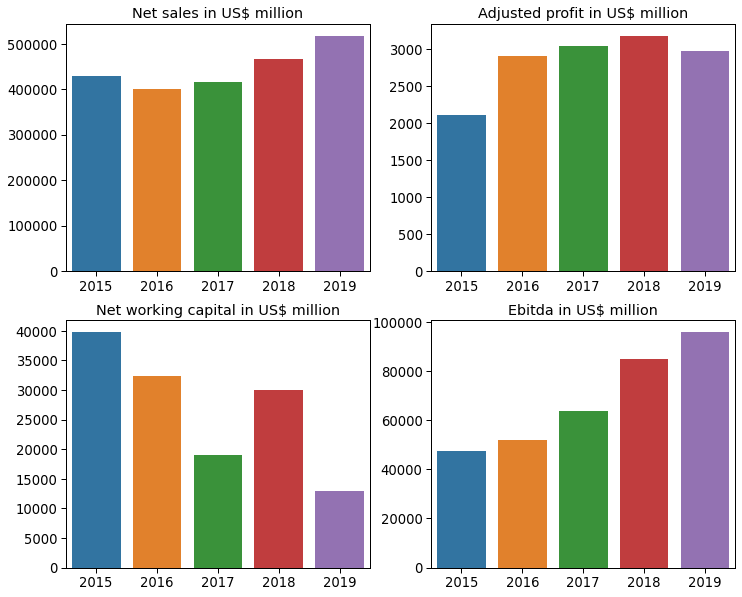

In [295]:
# Creating four barplots for the variables "Net sales US$ million", "Adjusted profit in US$ million", "Net working capital in US$million" and "Ebitda in US$million" 
f, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=False);
df_by_year_a = sns.barplot(data=df_by_year, x="year", y="net_sales_US$million", ax=axes[0, 0]);
df_by_year_b = sns.barplot(data=df_by_year, x="year", y="adjusted_profit_US$million", ax=axes[0, 1]);
df_by_year_c = sns.barplot(data=df_by_year, x="year", y="net_working_capital_US$million", ax=axes[1, 0]);
df_by_year_d = sns.barplot(data=df_by_year, x="year", y="ebitda_US$million", ax=axes[1, 1]);
df_by_year_a.set(xlabel='', ylabel='')
df_by_year_b.set(xlabel='', ylabel='')
df_by_year_c.set(xlabel='', ylabel='')
df_by_year_d.set(xlabel='', ylabel='')
df_by_year_a.set_title("Net sales in US$ million")
df_by_year_b.set_title("Adjusted profit in US$ million")
df_by_year_c.set_title("Net working capital in US$ million")
df_by_year_d.set_title("Ebitda in US$ million")


The previous graph suggests that this has been a period of crisis and recovery, as measured, respectively, by the indicators "Net sales in US million" and "EBITDA in US million"

In [296]:
# Create second dataframe in which variables are grouped by year and taken their average
df_by_year_2 = df.groupby(['year']).median() 
df_by_year_2.set_index('rank', inplace=True)
year = ['2015', '2016', '2017', '2018', '2019']
df_by_year_2['year'] = year
df_by_year_2

,net_sales_R$million,net_sales_US$million,net_sales_perc_growth,adjusted_net_income_US$million,legal_net_income_US$million,adjusted_shareholder_equity_US$million,legal_net_equity_US$million,adjusted_profit_US$million,legal_profitability_perc,sales_profitability_perc,net_working_capital_US$million,general_liquidity,general_indebtedness_perc,long_term_indebtedness_perc,employees,wages_and_charges_US$million,ebitda_US$million,year
rank,,,,,,,,,,,,,,,,,,
254,3064.9,760.4,1.3,24.0,25.7,342.2,310.7,10.4,11.3,3.1,73.7,0.9,60.8,23.4,3231.0,66.2,79.0,2015
266,2718.8,674.5,-2.6,29.6,29.9,380.0,356.6,11.8,12.3,4.1,65.3,0.9,60.4,22.5,3198.0,63.2,79.3,2016
272,2818.4,699.2,4.0,30.9,30.7,368.3,354.3,11.5,11.7,3.5,66.0,1.0,61.0,21.2,2994.0,62.7,81.1,2017
262,3014.3,747.8,7.6,37.8,39.1,357.8,347.9,11.9,12.4,4.6,76.2,1.0,60.8,22.5,3037.0,63.9,85.5,2018
255,3212.6,797.0,3.8,44.8,46.3,356.8,344.6,12.4,12.8,4.9,74.9,1.0,63.3,23.4,2693.0,55.8,87.2,2019


Text(0.5, 1.0, 'Long term indebtedness perc')

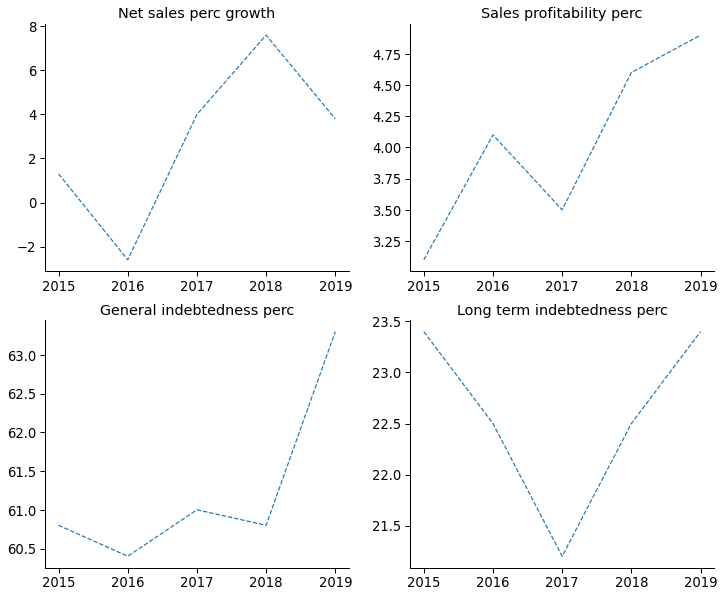

In [297]:
# Creating four lineplots for the variables "Net sales US$ million", "Sales profitability perc", "General indebtedness perc" and "long term indebtedness perc" 
f, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=False);
df_by_year_2a = sns.lineplot(data=df_by_year_2, x="year", y="net_sales_perc_growth", linestyle='--', ax=axes[0, 0]);
df_by_year_2b = sns.lineplot(data=df_by_year_2, x="year", y="sales_profitability_perc", linestyle='--', ax=axes[0, 1]);
df_by_year_2c = sns.lineplot(data=df_by_year_2, x="year", y="general_indebtedness_perc", linestyle='--', ax=axes[1, 0]);
df_by_year_2d = sns.lineplot(data=df_by_year_2, x="year", y="long_term_indebtedness_perc", linestyle='--', ax=axes[1, 1]);
sns.despine()
df_by_year_2a.set(xlabel='', ylabel='')
df_by_year_2b.set(xlabel='', ylabel='')
df_by_year_2c.set(xlabel='', ylabel='')
df_by_year_2d.set(xlabel='', ylabel='')
df_by_year_2a.set_title("Net sales perc growth")
df_by_year_2b.set_title("Sales profitability perc")
df_by_year_2c.set_title("General indebtedness perc")
df_by_year_2d.set_title("Long term indebtedness perc")


The previous graph suggests that this has been a period of crisis and recovery, as measured, respectively, by the indicators "Net sales perc growth" (crisis) and "Sales profitability perc" (recovery)

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



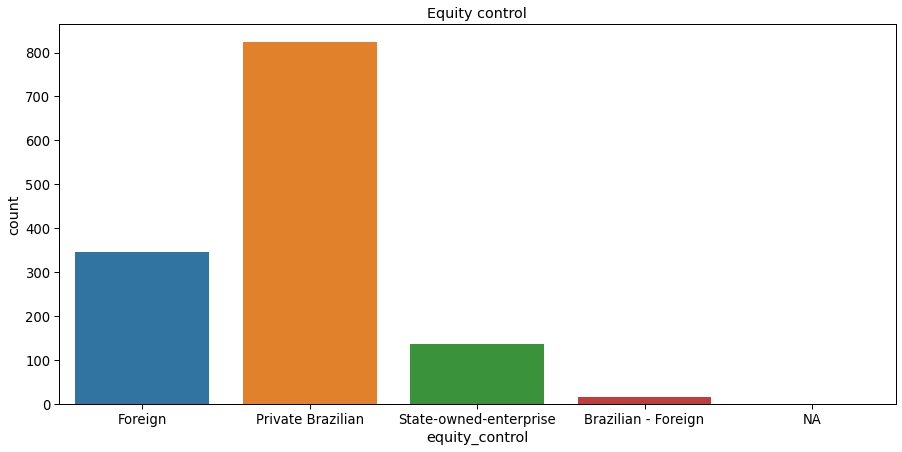

In [298]:
# Creating "Equity control" count plot
plt.figure(figsize=(15, 7))
sns.set_context("paper", font_scale=1.5)  
plt.xlim(0, 40000)
ax = sns.countplot(df['equity_control'])
ax.set_title('Equity control')
plt.show()

This graph tells us that most companies in the ranking are Brazilian and in the private sector. The second largest group is that of foreign companies, followed by a distant third of SEOs.

In [299]:
# Creating scatterplot for the variables "Net sales US$ million" and "Legal net income US$ million"
fig = px.scatter(df, x="net_sales_US$million", y="legal_net_income_US$million", color_discrete_sequence=px.colors.qualitative.Alphabet) 
fig.show()

This graph also tells that the vast majority of data points are concentrated in the low legal net income and net sales in US$ million tier. 

In [300]:
# Creating scatterplot for the variables "Net sales US$ million" and "Sales profitability %"
fig = px.scatter(df, x="net_sales_US$million", y="sales_profitability_perc", color_discrete_sequence=px.colors.qualitative.Dark2) 
fig.show()

This graph tells us that there are very few companies with large net sales in US$ million, but that there is a lower variance in sales profitability in %. 

In [301]:
# Creating scatterplot for the variables "Net working capital US$ million" and "EBITDA US$ million"
fig = px.scatter(df, x="net_working_capital_US$million", y="ebitda_US$million", color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

This graph tells us that in the periof of consideration there has been a very large variance in the "Net working capital US$ million" and "EBITDA in US million" categories

In [302]:
# Creating scatterplot for the variables "Employees" and "Wages and charges US$ million"
fig = px.scatter(df, x="employees", y="wages_and_charges_US$million", color_discrete_sequence=px.colors.qualitative.Alphabet) 
fig.show()

This graph tells is that most Brazilian firms in EXAME'S ranking tend to have low expenses with wages and charges, and that there is a large variance in the "Employees" category.

Text(0.5, 1.0, 'Brazilian - Foreign')

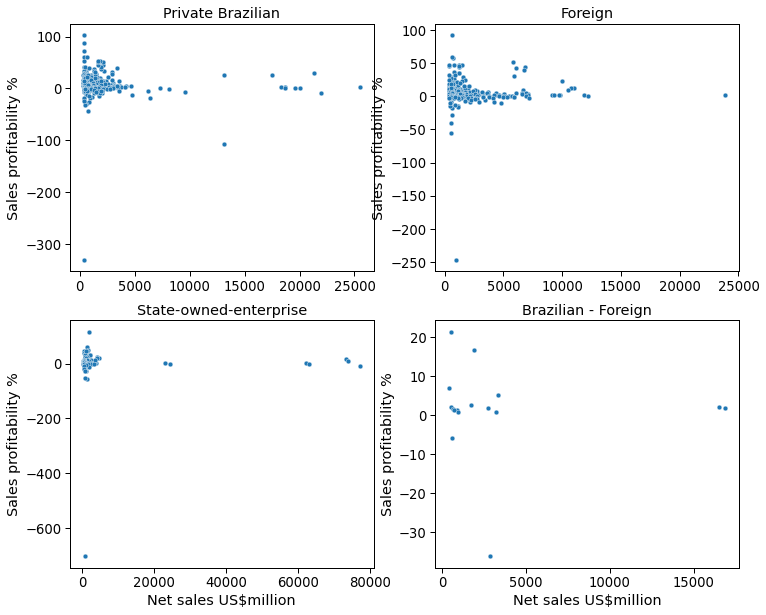

In [303]:
# Creating four scatterplots for the variables "Net sales US$ million" and "Sales profitability %" for the four equity control
#(ownership) categories
df2 = df.loc[(df['equity_control'] == 'Private Brazilian')]
df3 = df.loc[(df['equity_control'] == 'Foreign')]
df4 = df.loc[(df['equity_control'] == 'State-owned-enterprise')]
df5 = df.loc[(df['equity_control'] == 'Brazilian - Foreign')]
f, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=False);
a = sns.scatterplot(data=df2, x="net_sales_US$million", y="sales_profitability_perc", ax=axes[0, 0]);
b = sns.scatterplot(data=df3, x="net_sales_US$million", y="sales_profitability_perc", ax=axes[0, 1]);
c = sns.scatterplot(data=df4, x="net_sales_US$million", y="sales_profitability_perc", ax=axes[1, 0]);
d = sns.scatterplot(data=df5, x="net_sales_US$million", y="sales_profitability_perc", ax=axes[1, 1]);
a.set(xlabel='', ylabel='Sales profitability %')
b.set(xlabel='', ylabel='Sales profitability %')
c.set(xlabel='Net sales US$million', ylabel='Sales profitability %')
d.set(xlabel='Net sales US$million', ylabel='Sales profitability %')
a.set_title("Private Brazilian")
b.set_title("Foreign")
c.set_title("State-owned-enterprise")
d.set_title("Brazilian - Foreign")


This graph tells us that the most profitable companies are either private Brazilian or foreign. As expected, SEOs operate with a lower profit margin but may also have huge Net sales in US$ million.

Text(0.5, 1.0, 'Brazilian - Foreign')

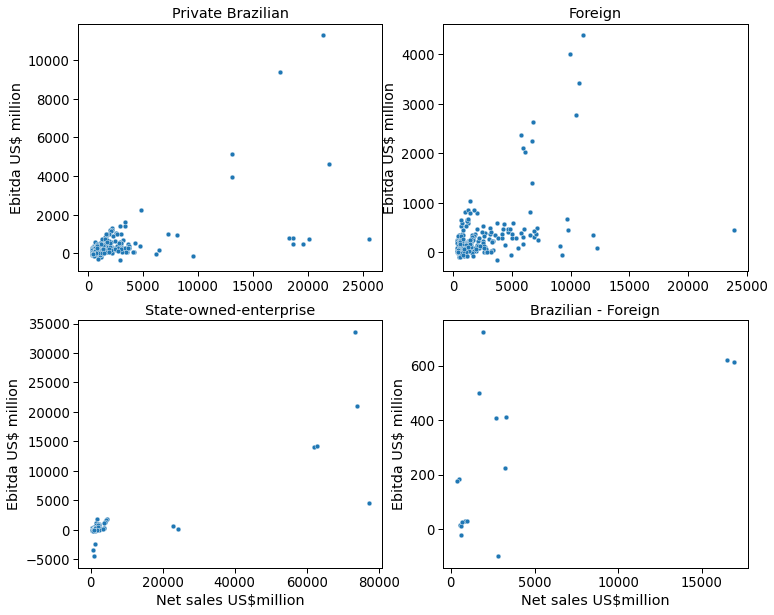

In [304]:
# Creating four scatterplots for the variables "Net sales US$ million" and "EBITDA US$ million" for the four equity control
# (ownership) categories
f, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=False);
g = sns.scatterplot(data=df2, x="net_sales_US$million", y="ebitda_US$million", ax=axes[0, 0]);
h = sns.scatterplot(data=df3, x="net_sales_US$million", y="ebitda_US$million", ax=axes[0, 1]);
i = sns.scatterplot(data=df4, x="net_sales_US$million", y="ebitda_US$million", ax=axes[1, 0]);
j = sns.scatterplot(data=df5, x="net_sales_US$million", y="ebitda_US$million", ax=axes[1, 1]);
g.set(xlabel='', ylabel='Ebitda US$ million')
h.set(xlabel='', ylabel='Ebitda US$ million')
i.set(xlabel='Net sales US$million', ylabel='Ebitda US$ million')
j.set(xlabel='Net sales US$million', ylabel='Ebitda US$ million')
g.set_title("Private Brazilian")
h.set_title("Foreign")
i.set_title("State-owned-enterprise")
j.set_title("Brazilian - Foreign")

Similar conclusions regarding the performance of private brazilian, foreign and SEOs are reached when juxtaposing EBITDA in US$ million and Net sales in US million indicators. 

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\kaypa\anaconda3\lib\site-pac

Text(0.5, 1.0, 'Brazilian - Foreign')

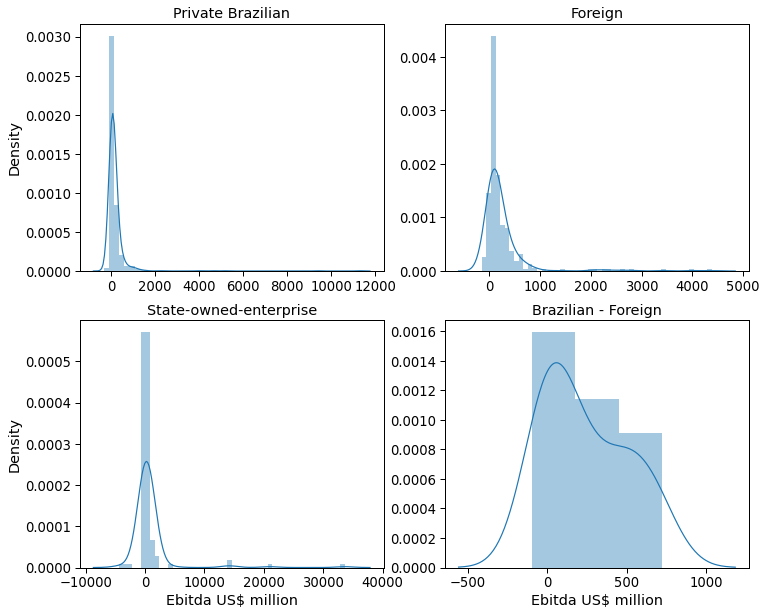

In [305]:
# Creating four distplot for the variable "Net sales US$ million" for the four equity control
# (ownership) categories
f, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=False);
g = sns.distplot(df2["ebitda_US$million"], ax=axes[0, 0]);
h = sns.distplot(df3["ebitda_US$million"], ax=axes[0, 1]);
i = sns.distplot(df4["ebitda_US$million"], ax=axes[1, 0]);
j = sns.distplot(df5["ebitda_US$million"], ax=axes[1, 1]);
g.set(xlabel='', ylabel='Density')
h.set(xlabel='', ylabel='')
i.set(xlabel='Ebitda US$ million', ylabel='Density')
j.set(xlabel='Ebitda US$ million', ylabel='')
g.set_title("Private Brazilian")
h.set_title("Foreign")
i.set_title("State-owned-enterprise")
j.set_title("Brazilian - Foreign")

- <a class="anchor" id="Question-4-Answer">Answer to question 4:</a> In this graph it is possible to see that SEOs and Foreign companies are either extremely sucessful (see the small bars to the right of the x axis) or perform poorly what regards their EBITDA in US. By contrast, private Brazilian companies were less profitable as measured by the EBITDA in the period.

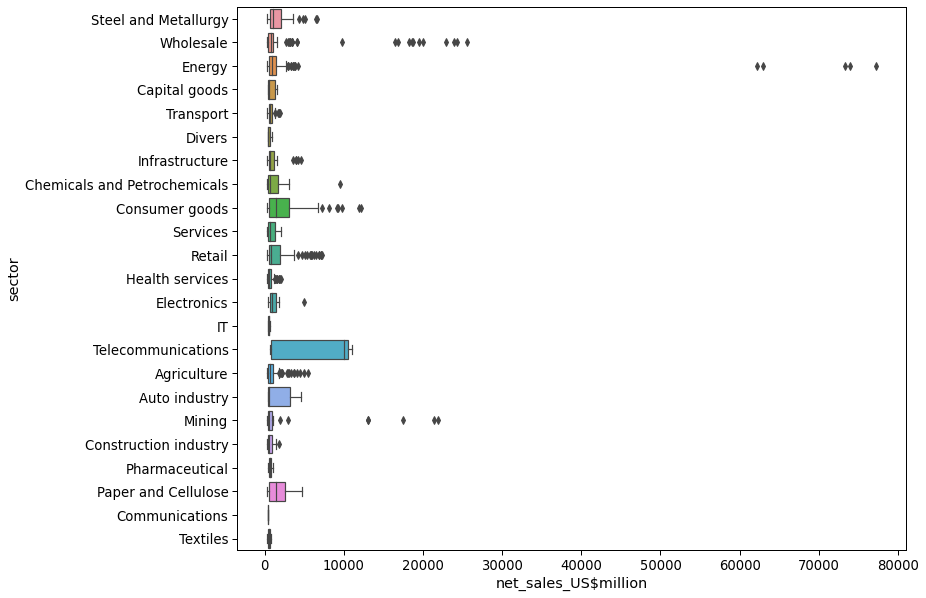

In [306]:
# Creating boxplots for the categories "Net sales US$ million" and "sector"
plt.figure(figsize=(12, 10))
sns.boxplot(x ='net_sales_US$million',y='sector', data=df)
plt.show()

This graph tells us that the sectors with the largest Net sales in US$ million in Brazil's economy are energy, mining and wholesale. 

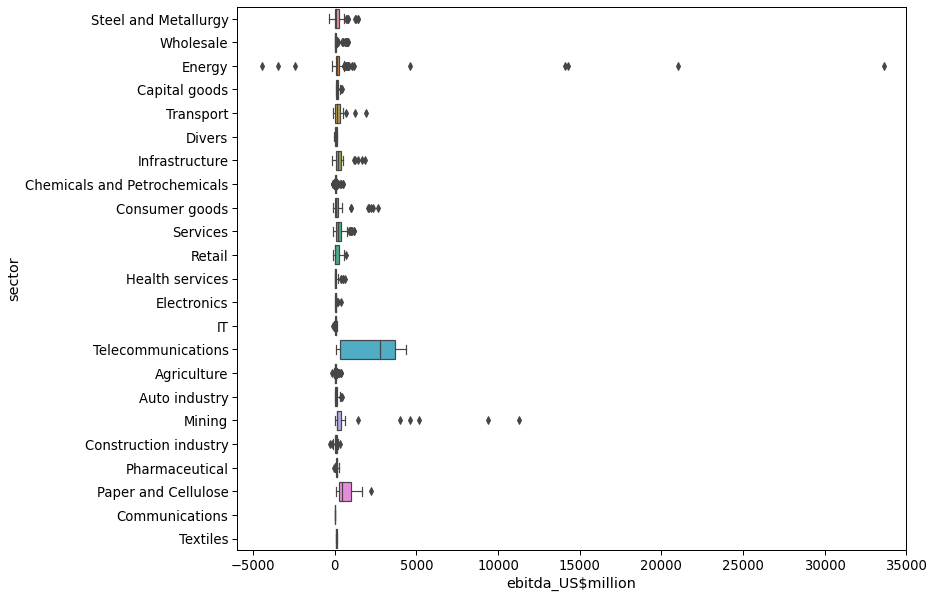

In [307]:
# Creating boxplots for the categories "EBITDA US$ million" and "sector"
plt.figure(figsize=(12, 10))
plt.xlim(-6000,35000)
sns.boxplot(x ='ebitda_US$million',y='sector', data=df)
plt.show()

This graph tells us that the sectors with the largest variance in the EBITDA in US$ million are energy and mining. This possibly reflects the different ownership structures in these sectors (private brazilian, foreign and SEOs).

### <a class="anchor" id="Model-Preparation">Part III : Model Preparation</a>

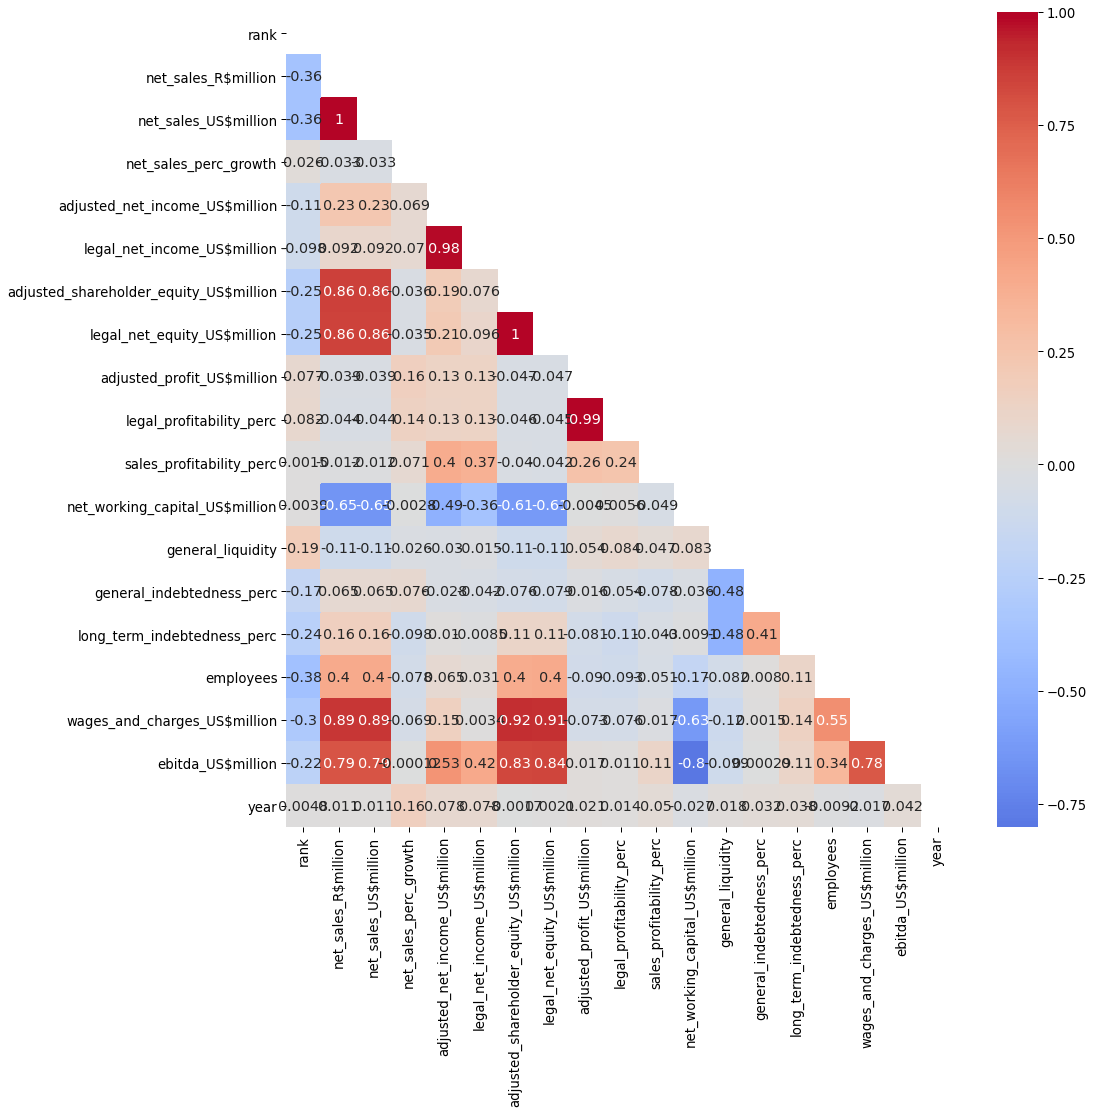

In [308]:
# Creating heatmap for the data
fig, ax = plt.subplots(figsize=(15, 15))

mask=np.zeros_like(df.corr()) #uses the mask technique to make the correlation matrix easier to see
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df.corr(),  
            mask=mask,  # with this, the fields are "deactivated" in the heatmap according to the mask
            annot=True,  # makes sure that the actual values of correlation are shown in the map
            cmap='coolwarm',  # the coolwarm map modality is set
            center=0,  # with this negative correlations are displayed as negatives
           )
plt.show()

The heatmap is telling that there are not many variables with a strong correlation. "Sales profitability in %", a possible candidate for being the dependent variable, is not strongly correlated to any other variable. The variable "EBITDA in US* million", whose informative content is analogous, is thus chosen as the dependent variable. To avoid the problem of multicollinearity, only one variable to which "EBITDA in US* million" is strongly correlated may be chosen. The choice falls on "Net sales in US* million". 

*Note that the the $ has not been used above, to avoid text edition errors.

In [309]:
# Filtering the df according to different types of equity control
df_test1 = df.loc[(df['equity_control'] == 'Private Brazilian')]
df_test2 = df.loc[(df['equity_control'] == 'Foreign')]
df_test3 = df.loc[(df['equity_control'] == 'State-owned-enterprise')]


In [310]:
def preliminary_model_evaluation(df):
    """
    This is a function for preliminary model evaluation using OLS (not Machine learning) to be applied to the
    different types of equity control. The function adds year dummies. 
    """
    one_hot = pd.get_dummies(df, columns = ['year'])
    Y = one_hot['ebitda_US$million']
    X = one_hot[['net_working_capital_US$million', 'net_sales_US$million', 'sales_profitability_perc', 'employees', 'long_term_indebtedness_perc', 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019']]
    X = sm.add_constant(X)

    model = sm.OLS(Y,X)
    result = model.fit()
    
    print(result.params)
    print(result.summary())


In [311]:
# Appliying the function to the entire dataframe
preliminary_model_evaluation(df)

const                            -48.799708
net_working_capital_US$million    -0.524487
net_sales_US$million               0.118737
sales_profitability_perc           4.783603
employees                          0.010500
long_term_indebtedness_perc        2.986678
year_2015                        -35.526511
year_2016                        -41.253840
year_2017                        -26.295149
year_2018                         40.424617
year_2019                         13.851174
dtype: float64
                            OLS Regression Results                            
Dep. Variable:      ebitda_US$million   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     536.6
Date:                Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:11:54   Log-Likelihood:                -10408.
No. Observations:          

* The model performs well, with a solid R², high and statistifally significant F-Statistic, and statistically significant coefficients.
* All variables are correlated positively with the dependent variable, with the exception of "Net working capital in US million", which comes as a surprise. I expected companies with a high "Net working capital in US million" to have a higher degree of maneuvre to invest and thus to improve their "EBITDA in US million". 
* There are three possibilities here. The first one (a) is that the causality is the other way around, such that it is the "EBITDA in US million" that negatively influences the "Net working capital US million". A further step would be thus to carry out a Granger causality test. The second one (b) is that profitable companies do not need to invest have a high "Net working capital in US million" to be profitable, as measured by the "EBITDA in US million". The third one (c) is that large outliers are affecting the findings. 

In [312]:
# Appliying the function to the subset of private Brazilian companies
preliminary_model_evaluation(df_test1)

const                            -126.445370
net_working_capital_US$million      0.232997
net_sales_US$million                0.131886
sales_profitability_perc            4.593406
employees                           0.011958
long_term_indebtedness_perc         1.036701
year_2015                         -29.903838
year_2016                         -30.178257
year_2017                          -0.645383
year_2018                         -16.896884
year_2019                         -48.821008
dtype: float64
                            OLS Regression Results                            
Dep. Variable:      ebitda_US$million   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     78.04
Date:                Fri, 15 Oct 2021   Prob (F-statistic):          8.83e-104
Time:                        17:11:54   Log-Likelihood:                -6199.9
No. Observations

* The model does not perform as well for the subset of private Brazilian companies.
* On the other hand, here the indicator "Net working capital US million" is positively correlated with "EBITDA in US million". 


In [313]:
# Appliying the function to the subset of foreign companies
preliminary_model_evaluation(df_test2)

const                             -7.610606
net_working_capital_US$million    -0.206005
net_sales_US$million               0.105789
sales_profitability_perc           7.000196
employees                          0.002169
long_term_indebtedness_perc        0.881405
year_2015                         20.792413
year_2016                        -52.028278
year_2017                         -6.237050
year_2018                         11.084496
year_2019                         18.777814
dtype: float64
                            OLS Regression Results                            
Dep. Variable:      ebitda_US$million   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     25.89
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           9.21e-34
Time:                        17:11:54   Log-Likelihood:                -2543.7
No. Observations:          

* The model also does not perform as well for the subset of foreign companies.
* For foreign companies, the indicator "Net working capital US million" is negatively correlated with "EBITDA in US million". 

In [314]:
# Appliying the function to the subset of SEOs
preliminary_model_evaluation(df_test3)

const                             188.885715
net_working_capital_US$million     -0.922913
net_sales_US$million                0.027133
sales_profitability_perc            2.493301
employees                          -0.006188
long_term_indebtedness_perc         2.305331
year_2015                        -219.241261
year_2016                         119.053611
year_2017                          -1.574557
year_2018                          68.997054
year_2019                         221.650868
dtype: float64
                            OLS Regression Results                            
Dep. Variable:      ebitda_US$million   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     376.6
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           1.44e-87
Time:                        17:11:54   Log-Likelihood:                -1103.9
No. Observations

* For SEOS only, the model has a very high R² but there are some variables for there is no sufficient statistical significant that they are correlated with the dependent variable. 
* For SEOs, the indicator "Net working capital US million" is negatively correlated with "EBITDA in US million".

### <a class="anchor" id="Machine-Learning-Modelling">Part IV : Machine Learning Modelling</a>

In [315]:
def load_data(df):
    """The function loads the data and specifies the model that will be estimated.
    
    Input:
    Df
       
    Output:
    Independent and dependent variables.
    """

    one_hot = pd.get_dummies(df, columns = ['year'])
    y = one_hot['ebitda_US$million']
    X = one_hot[['net_working_capital_US$million', 'net_sales_US$million', 'sales_profitability_perc', 'employees', 'long_term_indebtedness_perc', 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019']]

    return X,y 

In [316]:
def model_split(X, y):    
    """The function splits the data into training and test sets, scales and fits it. 
    
    Input:
    Independent and dependent variables
       
    Output:
    X_train, X_test, y_train, y_test
    """
    
    #split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    #Scaling and fitting on training and test data
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)

    return X_train, X_test, y_train, y_test


In [317]:
def predict_and_metrics(model, X_train, X_test, y_train, y_test): 
    """The function predicts and build metrics. 
    
    Input:
    model, X_train, X_test, y_train, y_test
       
    Output:
    predictions, r2, mse, rmse, mae, mean
    """
    
    model = model.fit(X_train, y_train)
    predictions  = model.predict(X_test)
    r2 = r2_score(y_test, predictions).astype(float).round(decimals=3)
    mse = mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    mean = predictions.mean().astype(float).round(decimals=3)
    coef = model.coef_.round(decimals=3)
        
    name = [model]
    indexa = ["r2","mse", "rmse","mean", "mae", "coef"]
    data_use = [r2, mse, rmse, mean, mae, coef]
    
    results = pd.DataFrame(data=data_use, index=indexa, columns=name).round(decimals=2)
    
    print(results)
    
    return results


In [318]:
def predict_and_metrics_RF(model, X_train, X_test, y_train, y_test): 
    """The function predicts and build metrics specifically for the Random Forest regression case, by specifying parameters 
    and using Gridsearch.
    
    Input:
    model, X_train, X_test, y_train, y_test
       
    Output:
    predictions, r2, mse, rmse, mae, mean
    """
    
    #Hyperparameter tuning
    parameters = {'n_estimators': [50, 100, 200], 'max_depth': [2, 10, 15, 50,100]}
    cv = GridSearchCV(random_forest, param_grid = parameters, verbose=10)
     
    #Fitting and generating metrics    
    model = cv.fit(X_train, y_train)   
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions).astype(float).round(decimals=3)
    mse = mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    mean = predictions.mean().astype(float).round(decimals=3)
    
    #Reporting characteristics of chosen model
    cv1 = cv.best_params_
    
    #Running baseline RF model for comparison
    rf = RandomForestRegressor() 
    rf.fit(X_train,y_train)
    predictions2 = rf.predict(X_test)
    r2_2 = r2_score(y_test, predictions2).astype(float).round(decimals=3)
    difference = r2 - r2_2
    
    #Creating DF for reporting results    
    name = ["random forest"]
    indexa = ["r2","mse","rmse","mae","mean"]
    data_use = [r2, mse, rmse, mae, mean]
    results = pd.DataFrame(data=data_use, index=indexa, columns=name).round(decimals=3)
    
    print(results)
    print(f'R2 baseline RF: {round(r2_2,3)}')
    print(f'Difference in performance between baseline RF and tuned RF: {round(difference,3)}')
    print(f'Best parameters: {(cv1)}')
        
    return results


In [319]:
# Specifying the regressors that will be used below
lin_model = LinearRegression()
random_forest = RandomForestRegressor(random_state= 42) 
SGDR = SGDRegressor(max_iter=1000, tol=1e-3)
bayesian = linear_model.BayesianRidge() 

In [320]:
def main(model):
    """The runs the model. 
    
    Input:
    model
   
    """
    X, y = load_data(df)
    X_train, X_test, y_train, y_test = model_split(X,y)
    
    
    if model == random_forest: 
        predict_and_metrics_RF(model, X_train, X_test, y_train, y_test)
    else:
        predict_and_metrics(model, X_train, X_test, y_train, y_test)

In [321]:
#Run models
main(random_forest), main(lin_model),main(SGDR),main(bayesian) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START max_depth=2, n_estimators=50...............................
[CV 1/5; 1/15] END max_depth=2, n_estimators=50;, score=0.111 total time=   0.0s
[CV 2/5; 1/15] START max_depth=2, n_estimators=50...............................
[CV 2/5; 1/15] END max_depth=2, n_estimators=50;, score=-0.866 total time=   0.0s
[CV 3/5; 1/15] START max_depth=2, n_estimators=50...............................
[CV 3/5; 1/15] END max_depth=2, n_estimators=50;, score=0.100 total time=   0.0s
[CV 4/5; 1/15] START max_depth=2, n_estimators=50...............................
[CV 4/5; 1/15] END max_depth=2, n_estimators=50;, score=0.665 total time=   0.0s
[CV 5/5; 1/15] START max_depth=2, n_estimators=50...............................
[CV 5/5; 1/15] END max_depth=2, n_estimators=50;, score=0.890 total time=   0.0s
[CV 1/5; 2/15] START max_depth=2, n_estimators=100..............................
[CV 1/5; 2/15] END max_depth=2, n_estimators=10

[CV 1/5; 11/15] END max_depth=50, n_estimators=100;, score=0.462 total time=   0.3s
[CV 2/5; 11/15] START max_depth=50, n_estimators=100............................
[CV 2/5; 11/15] END max_depth=50, n_estimators=100;, score=-0.860 total time=   0.4s
[CV 3/5; 11/15] START max_depth=50, n_estimators=100............................
[CV 3/5; 11/15] END max_depth=50, n_estimators=100;, score=0.755 total time=   0.4s
[CV 4/5; 11/15] START max_depth=50, n_estimators=100............................
[CV 4/5; 11/15] END max_depth=50, n_estimators=100;, score=0.709 total time=   0.3s
[CV 5/5; 11/15] START max_depth=50, n_estimators=100............................
[CV 5/5; 11/15] END max_depth=50, n_estimators=100;, score=0.927 total time=   0.4s
[CV 1/5; 12/15] START max_depth=50, n_estimators=200............................
[CV 1/5; 12/15] END max_depth=50, n_estimators=200;, score=0.475 total time=   0.8s
[CV 2/5; 12/15] START max_depth=50, n_estimators=200............................
[CV 2/5; 

(None, None, None, None)

Because the results of the three last regression models are fairly similar and that of the Random Forest regressor is poor, below I run the model for the individual years only with the linear regression. I change the test_size from 0.2 to 0.25 and recruit the MinMaxScaler instead of the StandardScaler.

In [322]:
def linear_regression_estimator(a):

    # Create column and year list
    cols = ["r2", "mse", "rmse", "mae", "mean", "coef"]
    year_list = [a]

    # Load data and create y and X
    df_subset = df.loc[df['year'] == a]
    #df_subset['ebitda_US$million'].fillna(value=df_subset['ebitda_US$million'].mean(), inplace=True)
    y = df_subset['ebitda_US$million']
    X = df_subset[['net_working_capital_US$million', 'net_sales_US$million', 'sales_profitability_perc', 'employees', 'long_term_indebtedness_perc']]  
    
    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
      
    #Scaling and fitting on training and test data   
    scaler=MinMaxScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
         
    # Call and fit model    
    model = LinearRegression(normalize=True)
    model = model.fit(X_train, y_train)
    
    # Generate predictions and metrics
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions).astype(float).round(decimals=3)
    mse = mean_squared_error(y_test, predictions)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    mean = predictions.mean().astype(float).round(decimals=3)
    coef = model.coef_.round(decimals=2)

    # Create results framework
    results_df = []
    results_df.append([r2, mse, rmse, mae, mean, coef])
    results_df = pd.DataFrame(data = results_df, index = year_list, columns = cols)   
    results_df_transposed = results_df.T
    
    return results_df_transposed



In [323]:
df_1 = linear_regression_estimator(2015).reset_index()
df_2 = linear_regression_estimator(2016).reset_index()
df_3 = linear_regression_estimator(2017).reset_index()
df_4 = linear_regression_estimator(2018).reset_index()
df_5 = linear_regression_estimator(2019).reset_index()
results_df_final = pd.merge(df_1, df_2, on="index")
results_df_final = pd.merge(results_df_final, df_3, on="index")
results_df_final = pd.merge(results_df_final, df_4, on="index")
results_df_final = pd.merge(results_df_final, df_5, on="index")
results_df_final.set_index('index', inplace=True)
results_df_final


C:\Users\kaypa\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



C:\Users\kaypa\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline

,2015,2016,2017,2018,2019
index,,,,,
r2,0.511,-5.66,0.929,0.405,-1.893
mse,164671,225482,215474,1.12165e+06,174151
rmse,405.797,474.849,464.192,1059.08,417.314
mae,175.675,188.488,213.096,298.614,217.926
mean,153.319,188.815,360.031,245.083,120.078
coef,"[4666.93, 6402.96, 612.05, 456.61, 185.63]","[-4128.72, 10201.59, 1643.53, 882.38, -95.17]","[-2194.59, 3433.52, 2017.64, 1257.85, 222.3]","[-11570.58, 10419.75, 1269.61, 448.96, 144.11]","[-25692.81, 8758.14, 579.64, 169.49, 146.82]"


- <a class="anchor" id="Question-1-Answer">Answer to question 1: </a>while it is possible to estimate EBITDA for the period as a whole, it gets more complicated for the individual years' estimation. The former either tells us that the EBITDA is low because of the economic crisis or because the average size of the Brazilian companies is small. For the latter estimation technique (for individual years, with linear regression), statistical significance is only reached in 2015, 2017, and 2018, which makes drawing conclusions more difficult, as the proposed model might be unsuitable. Nonetheless, it is interesting to notice that the predicted mean EBITDA grew from 2015 to 2017, signalling the beginning of a possible recovery. </a></a> 
- <a class="anchor" id="Question-2-Answer">Answer to question 2: </a> see parameters of the model</a></a>
- <a class="anchor" id="Question-3-Answer">Answer to question 3: </a> the results show that, with the exception of 2015, the Net working capital in US million does not correlate with a higher EBITDA. This suggest that, in general, companies with a larger degree of maneuvre for investments, as measured by the Net working capital in US million, are not necessarily more profitable. The exception is 2015. This means that the economic crisis might have led to a structural change what regards companies' investment behavior. </a></a>

### <a class="anchor" id="Conclusion">Part V : Conclusion</a>

The preliminary data cleaning and the EDA were considerably effortless steps. In the latter it was established that several indicators available for the set of Brazil's 500 largest companies in the 2015-2019 period - such as "Sales profitability in %", "Adjusted profit in US* million" and "EBITDA in US* million" - reflect a crisis scenario. 

In this context, the main goal of this project was to create a Machine Learning model capable of predicting the "EBITDA in US* million" and also in establishing its main determinants. The chosen independent variables were 'Net working capital in US* million', 'Net sales US* million', 'Sales profitability (perc.)", 'Employees', 'Long term indebtedness (perc.)'. The model includes dummies for the respective ears.

For running the model four of Sklearn's estimators were recruited: Linear Regression, Random Forest, SGDR and Bayesian. The results are solid for all four estimators, with the "EBITDA in US* million" being estimated in the US$ 189-233 range. A surprising result is that the indicator "Net working capital in US* million" has been found to have a negative relationship with the dependent variable "EBITDA in US* million".

*Once again, because of readability issues, I avoid using the cipher. 